Regression

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [115]:
df = pd.read_csv("wage.csv")
df.head(5)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


In [117]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

feduc      20.748663
meduc       8.342246
wage        0.000000
hours       0.000000
IQ          0.000000
educ        0.000000
exper       0.000000
tenure      0.000000
age         0.000000
married     0.000000
black       0.000000
dtype: float64

In [118]:
df.drop("feduc", axis=1, inplace=True)

In [119]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

meduc      8.342246
wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
dtype: float64

In [120]:
def fillNaN_numeric(df):
    numeric_cols = df.select_dtypes(include=["number"]).columns

    for col in numeric_cols:
        if df[col].isna().sum() != 0:
            df[col] = df[col].fillna(df[col].mean())

    return df

In [121]:
df = fillNaN_numeric(df)

In [123]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

wage       0.0
hours      0.0
IQ         0.0
educ       0.0
exper      0.0
tenure     0.0
age        0.0
married    0.0
black      0.0
meduc      0.0
dtype: float64

In [124]:
X = df.loc[:, df.columns != "wage"]
y = df.loc[:, df.columns == "wage"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (748, 9)
Shape of X_test: (187, 9)
Shape of y_train: (748, 1)
Shape of y_test: (187, 1)


In [128]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [129]:
y_hat = dtr.predict(X_test)

In [139]:
predictions = pd.DataFrame(
    {"y_test": y_test.to_numpy().flatten(), "y_hat": y_hat.ravel()}
)
predictions.head(5)

,y_test,y_hat
0,714000.0,1250000.0
1,1455000.0,1081000.0
2,865000.0,668000.0
3,1154000.0,864000.0
4,905000.0,1040000.0


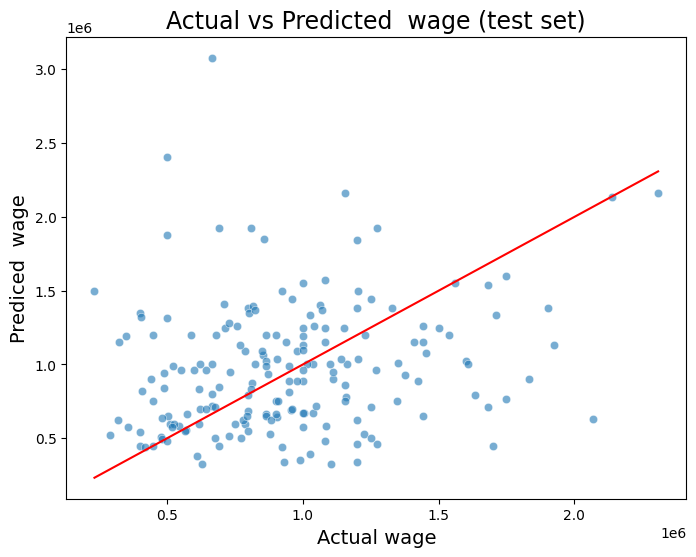

In [144]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.to_numpy().flatten(), y=y_hat, alpha=0.6)
sns.lineplot(x=y_test.to_numpy().flatten(), y=y_test.to_numpy().flatten(), color="red")

plt.xlabel("Actual wage", fontsize=14)
plt.ylabel("Prediced  wage", fontsize=14)
plt.title("Actual vs Predicted  wage (test set)", fontsize=17)
plt.show()

In [146]:
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error (MSE): {mse:0.3f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:0.3f}")

Mean Squared Error (MSE): 269354598930.481
Root Mean Squared Error (RMSE): 518993.833


In [149]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [151]:
RMSE_CV = []
for alpha in ccp_alphas:
    MSE = -cross_val_score(
        estimator=DecisionTreeRegressor(ccp_alpha=alpha),
        X=X_train,
        y=y_train,
        cv=5,
        scoring="neg_mean_squared_error",
    )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(ccp_alphas), columns=["alpha"])
output["RMSE_CV"] = RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000,541253.794787
1,668.449198,558323.481012
2,2673.796791,540396.212977
3,2673.796791,541475.467925
4,2673.796791,539994.910573


<Axes: xlabel='alpha', ylabel='RMSE_CV'>

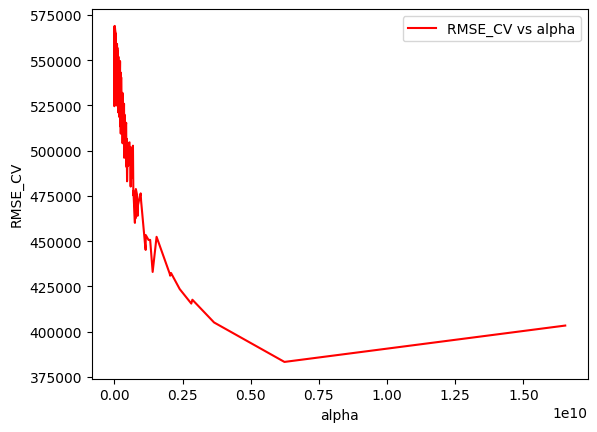

In [152]:
sns.lineplot(x="alpha", y="RMSE_CV", data=output, color="r", label="RMSE_CV vs alpha")

In [153]:
optimal_alpha = output.iloc[np.argmin(output["RMSE_CV"]),][0]
optimal_alpha

C:\Users\eghan\AppData\Local\Temp\ipykernel_7512\833067624.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]


6237870353.483444

In [154]:
opt_dtr = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
opt_dtr.fit(X_train, y_train)
y_hat_opt = opt_dtr.predict(X_test)

In [155]:
mse = mean_squared_error(y_test, y_hat_opt)
print(f"Mean Squared Error (MSE): {mse:0.3f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:0.3f}")

Mean Squared Error (MSE): 146715301951.008
Root Mean Squared Error (RMSE): 383034.335


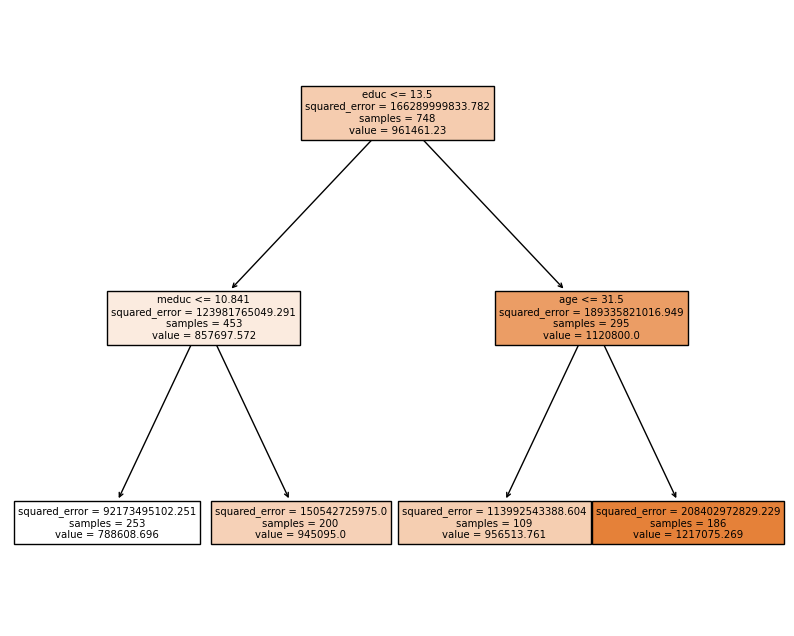

In [164]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, y_train)


fig = plt.figure(figsize=(10, 8))
plot_tree(dtr, feature_names=X_train.columns, filled=True)
plt.show()

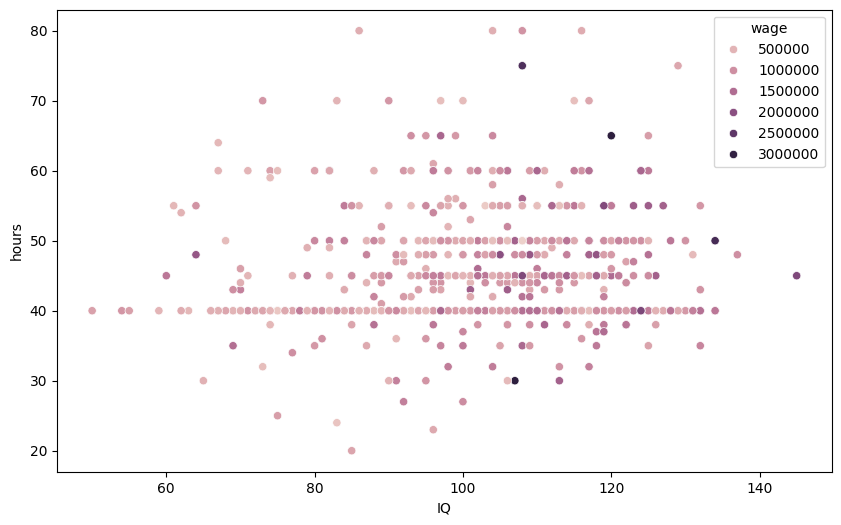

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="IQ", y="hours", data=df, hue="wage")
plt.show()

In [172]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train[["IQ"]], y_train)
wage_hat = dtree.predict(X_test[["IQ"]])

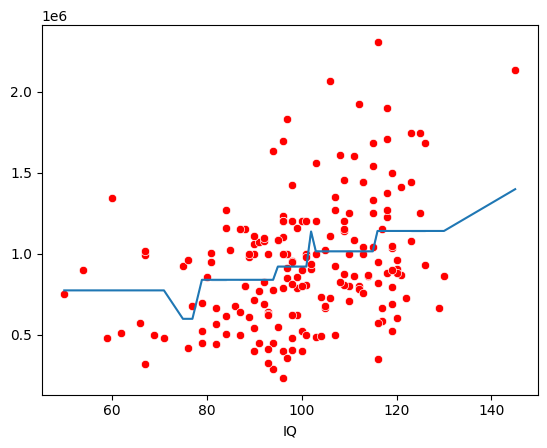

In [177]:
sns.scatterplot(data=X_test, x="IQ", y=y_test.to_numpy().flatten(), color="red")
sns.lineplot(x=X_test["IQ"], y=wage_hat)
plt.show()

Classification

In [178]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [180]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [185]:
cross_tab_percentage = (
    pd.crosstab(df["Purchased"], columns="count", normalize="all") * 100
)
cross_tab_percentage

col_0,count
Purchased,
0,64.25
1,35.75


In [186]:
df.drop("User ID", axis=1, inplace=True)

In [187]:
gender_map = {"Female": 0, "Male": 1}
df["Gender"] = df["Gender"].map(gender_map)

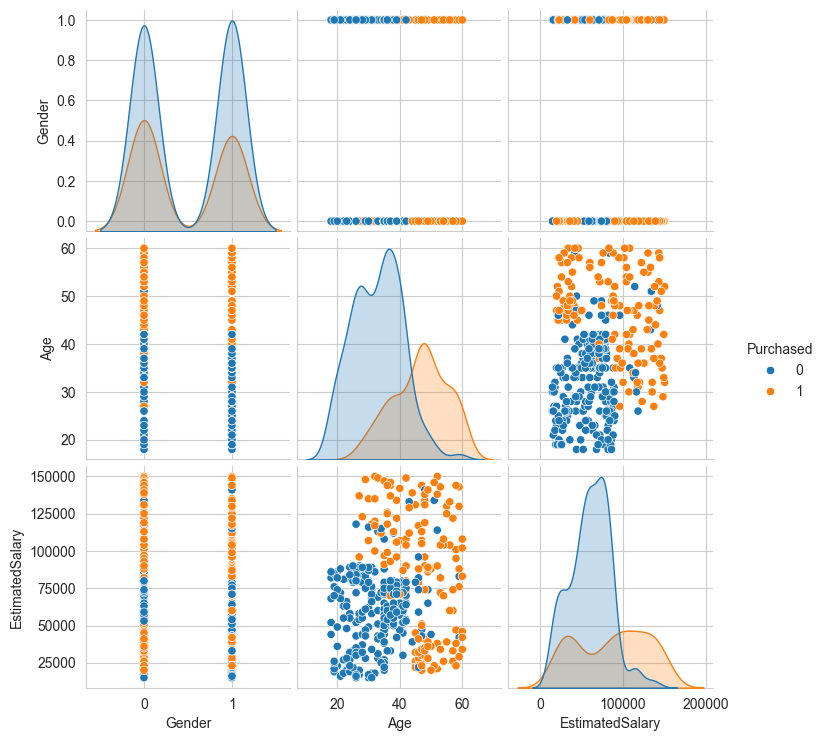

In [196]:
sns.pairplot(df, hue="Purchased")

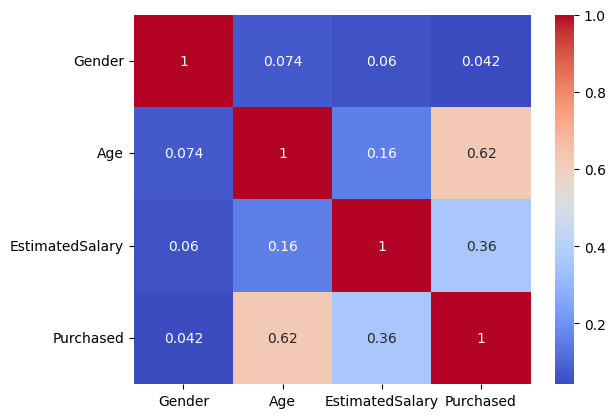

In [193]:
sns.heatmap(df.corr().abs(), cmap="coolwarm", annot=True)
plt.show()

In [197]:
X = df.loc[:, df.columns != "Purchased"]
y = df.loc[:, df.columns == "Purchased"]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [201]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
y_hat = dtc.predict(X_test)

In [205]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [206]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [207]:
accuracy_cv = []
for alpha in ccp_alphas:
    accuracy = cross_val_score(
        estimator=DecisionTreeClassifier(ccp_alpha=alpha),
        X=X_train,
        y=y_train,
        cv=5,
        scoring="accuracy",
    )
    accuracy_cv.append(np.mean(accuracy))

output = pd.DataFrame(list(ccp_alphas), columns=["alpha"])
output["accuracy_CV"] = accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.846875
1,0.001562,0.853125
2,0.001562,0.853125
3,0.001562,0.856250
4,0.001852,0.853125


<Axes: xlabel='alpha', ylabel='accuracy_CV'>

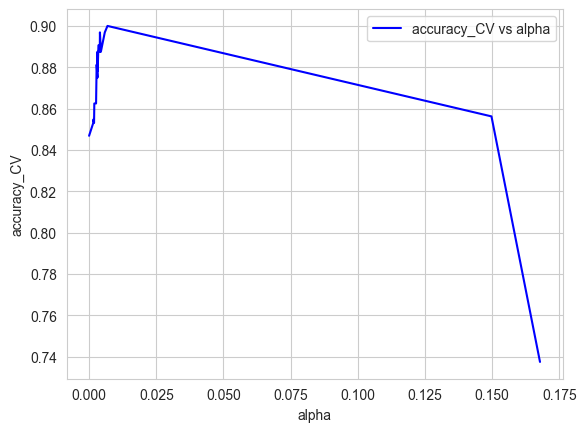

In [208]:
sns.lineplot(
    x="alpha", y="accuracy_CV", data=output, color="b", label="accuracy_CV vs alpha"
)

In [210]:
opt_alpha = output.iloc[np.argmax(output["accuracy_CV"]), 0]
opt_alpha

0.006848495212038303

In [211]:
opt_dtc = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
opt_dtc.fit(X_train, y_train)
y_hat_opt = opt_dtc.predict(X_test)

In [212]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



<Axes: xlabel='Age', ylabel='EstimatedSalary'>

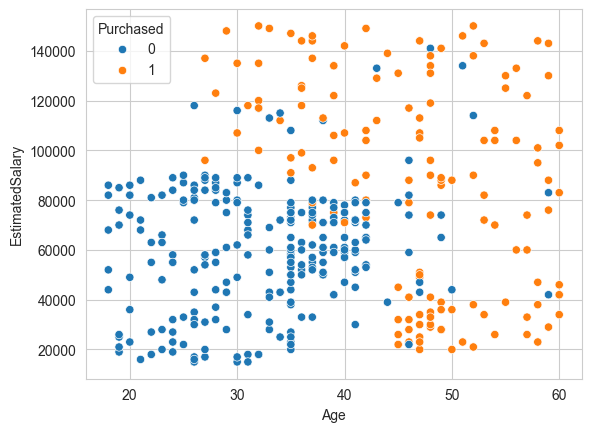

In [213]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased")

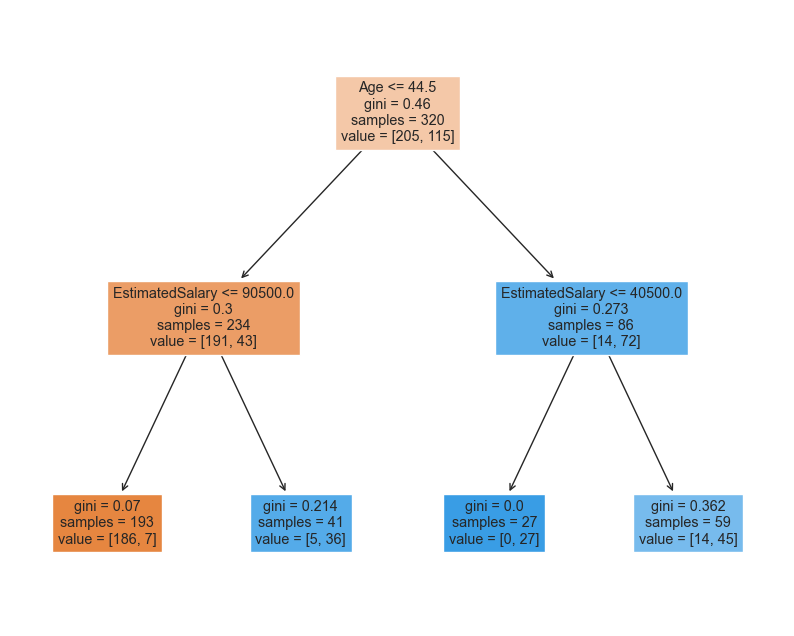

In [214]:
dtr = DecisionTreeClassifier(max_depth=2)
dtr.fit(X_train, y_train)


fig = plt.figure(figsize=(10, 8))
plot_tree(dtr, feature_names=X_train.columns, filled=True)
plt.show()